In [28]:
%pylab inline
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
from shapely.geometry import MultiPoint

Populating the interactive namespace from numpy and matplotlib


In [29]:
import os
print(os.getcwd())

/Users/sasali/Documents/Coursera/Capstone Project Detroit/data


In [30]:
os.chdir('/Users/sasali/Documents/Coursera/Capstone Project Detroit/data/')

In [31]:
# Load extracted feature data
temp_list = pd.read_csv('temp_list.csv')

In [32]:
temp_list.head(5)

,Unnamed: 0,Id,Lat,Lon
0,1,1,42.369786,-83.216326
1,2,2,42.325449,-83.064139
2,3,3,42.411997,-83.167339
3,4,4,42.441234,-83.219551
4,5,5,42.341516,-83.087758


Set eps=50 meters max distance that points can be from each other to be considered a cluster;
Set min_samples to 1 so that every data point gets assigned to either a cluster or forms its own cluster of 1. Nothing will be classified as noise.

In [33]:
coords = temp_list.as_matrix(columns=['Lat', 'Lon'])

In [34]:
ms_per_radian = 6371008.8
epsilon = 30/ms_per_radian 
db = DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine',n_jobs=4).fit(np.radians(coords))
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))

Number of clusters: 39529


In [66]:
temp_list['cluster_id'] = cluster_labels+1

In [67]:
temp_list.head(5)

,Unnamed: 0,Id,Lat,Lon,cluster_id
0,1,1,42.369786,-83.216326,1
1,2,2,42.325449,-83.064139,2
2,3,3,42.411997,-83.167339,3
3,4,4,42.441234,-83.219551,4
4,5,5,42.341516,-83.087758,5


In [68]:
temp_list.to_csv('../data/building_list.csv', index=False)

In [35]:
def get_centermost_point(cluster):
    centroid = (MultiPoint(cluster).centroid.x, MultiPoint(cluster).centroid.y)
    centermost_point = min(cluster, key=lambda point: great_circle(point, centroid).m)
    return tuple(centermost_point)
centermost_points = clusters.map(get_centermost_point)

In [36]:
lats, lons = zip(*centermost_points)
rep_points = pd.DataFrame({'lon':lons, 'lat':lats})

In [69]:
rep_points.to_csv('../data/cluster_list.csv', index=True)

In [37]:
rep_points

,lat,lon
0,42.369786,-83.216326
1,42.325700,-83.064300
2,42.411997,-83.167339
3,42.441070,-83.219404
4,42.341343,-83.087699
5,42.323726,-83.081573
6,42.330432,-83.088302
7,42.341719,-83.114206
8,42.337700,-83.112900
9,42.337800,-83.114300


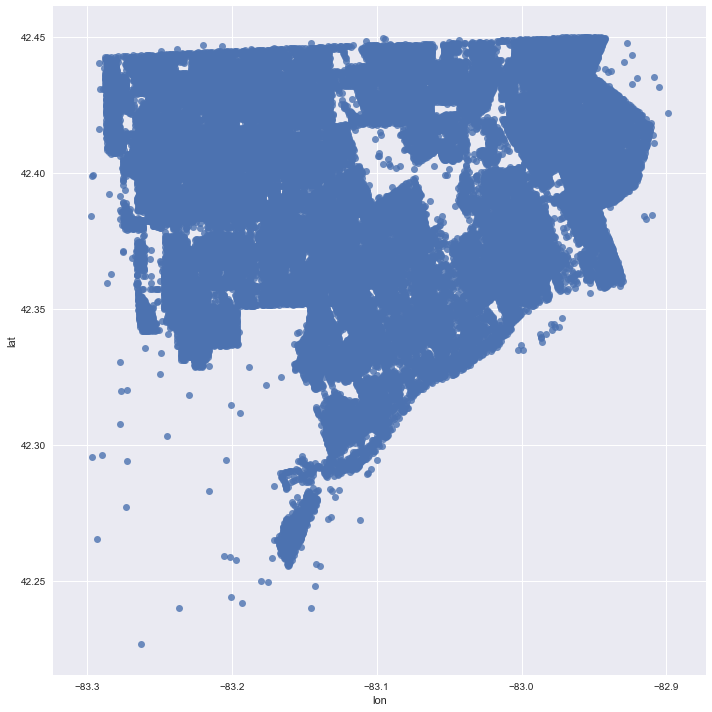

In [38]:
sns.lmplot('lon', 'lat', data=rep_points, fit_reg=False, size=10)